# Climate Model Warming Analysis

This notebook analyzes climate model data to understand the time difference between reaching 1.5°C and 2.0°C warming thresholds across different CMIP (Coupled Model Intercomparison Project) models.

## Overview
- Loads temperature data from CSV file
- Calculates temperature anomalies relative to 1850-1900 baseline
- Identifies when each model crosses 1.5°C and 2.0°C thresholds
- Visualizes the distribution of time differences between thresholds


In [11]:
# Import required libraries
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Loading
The following cell loads temperature data from the CSV file. The file is expected to have:
- First column: Years
- Subsequent columns: Temperature data for different climate models
- Header row with model names


In [16]:
data = pd.read_csv('annual_global_averages.csv', index_col=0)
data

,AS-RCEC.TaiESM1.gn_r1i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r1i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r2i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r3i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r4i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r5i1p1f1,NASA-GISS.GISS-E2-1-H.gn_r1i1p3f1,NASA-GISS.GISS-E2-1-H.gn_r2i1p3f1,NASA-GISS.GISS-E2-1-H.gn_r3i1p3f1,NASA-GISS.GISS-E2-1-H.gn_r4i1p3f1,...,MIROC.MIROC6.gn_r4i1p1f1,MIROC.MIROC6.gn_r50i1p1f1,MIROC.MIROC6.gn_r5i1p1f1,MIROC.MIROC6.gn_r6i1p1f1,MIROC.MIROC6.gn_r7i1p1f1,MIROC.MIROC6.gn_r8i1p1f1,MIROC.MIROC6.gn_r9i1p1f1,NCAR.CESM2.gn_r10i1p1f1,NCAR.CESM2.gn_r11i1p1f1,NCAR.CESM2.gn_r4i1p1f1
1850,276.77502,277.62463,277.53830,277.38090,277.59550,277.74408,278.26440,278.19327,278.08667,278.17150,...,280.15683,279.72310,279.84800,279.72754,279.40002,279.92690,279.78380,277.35120,277.61426,277.33220
1851,277.08896,277.63705,277.52390,277.42930,277.65860,277.58167,278.24780,278.43906,277.92910,278.27188,...,280.14750,279.85043,279.72043,279.80680,279.65050,279.80194,279.67322,277.45398,277.67792,277.32114
1852,277.08206,277.69095,277.18070,277.43964,277.57480,277.61440,278.17358,278.61140,278.24042,278.22256,...,279.85947,280.12570,279.78207,279.65910,279.81085,279.77972,279.69116,277.32810,277.79507,277.50375
1853,276.97525,277.54517,277.55142,277.42910,277.59634,277.53000,278.16446,278.33795,278.17996,278.40440,...,279.69113,279.85138,279.76123,279.89615,279.63460,279.59360,279.83182,277.30136,277.67053,277.35748
1854,276.99573,277.52115,277.47702,277.52970,277.42633,277.75530,278.23100,278.17712,277.99612,278.30560,...,279.70493,279.66696,279.88640,279.80347,279.61667,279.66327,279.95047,277.28910,277.72797,277.38278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,281.98978,281.80307,281.66815,281.60240,281.93137,281.94818,282.33360,282.04984,282.31168,282.22852,...,NaN,282.49270,NaN,NaN,NaN,NaN,NaN,281.79190,281.62833,281.50626
2097,281.97403,281.60800,281.72348,281.66513,281.93765,281.85226,282.24820,282.16187,282.19214,281.78520,...,NaN,282.50473,NaN,NaN,NaN,NaN,NaN,281.67062,281.64566,281.70400
2098,281.99557,281.70395,281.55780,281.68402,282.03342,281.77707,282.07288,281.90887,282.37690,281.87375,...,NaN,282.42892,NaN,NaN,NaN,NaN,NaN,281.35284,281.62598,281.71140
2099,281.74283,281.67493,281.63460,281.82278,282.07474,281.74475,282.30118,282.03800,282.32397,282.14440,...,NaN,282.63920,NaN,NaN,NaN,NaN,NaN,281.56345,281.70554,281.47850


## Baseline Calculation
Calculate the baseline temperature for each model using the 1850-1900 period, following IPCC guidelines. This baseline will be used to compute temperature anomalies.


In [48]:
anomalies = data - data.loc[1850:1900].mean(axis=0)
anomalies

,AS-RCEC.TaiESM1.gn_r1i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r1i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r2i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r3i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r4i1p1f1,CSIRO-ARCCSS.ACCESS-CM2.gn_r5i1p1f1,NASA-GISS.GISS-E2-1-H.gn_r1i1p3f1,NASA-GISS.GISS-E2-1-H.gn_r2i1p3f1,NASA-GISS.GISS-E2-1-H.gn_r3i1p3f1,NASA-GISS.GISS-E2-1-H.gn_r4i1p3f1,...,MIROC.MIROC6.gn_r4i1p1f1,MIROC.MIROC6.gn_r50i1p1f1,MIROC.MIROC6.gn_r5i1p1f1,MIROC.MIROC6.gn_r6i1p1f1,MIROC.MIROC6.gn_r7i1p1f1,MIROC.MIROC6.gn_r8i1p1f1,MIROC.MIROC6.gn_r9i1p1f1,NCAR.CESM2.gn_r10i1p1f1,NCAR.CESM2.gn_r11i1p1f1,NCAR.CESM2.gn_r4i1p1f1
1850,-0.326721,0.239932,0.127337,-0.088137,0.01817,0.173081,0.009706,-0.177336,-0.137538,-0.168969,...,0.272572,-0.118493,-0.033976,-0.115816,-0.434624,0.027541,-0.013807,-0.247704,-0.056387,-0.207309
1851,-0.012781,0.252352,0.112937,-0.039737,0.08127,0.010671,-0.006894,0.068454,-0.295108,-0.068589,...,0.263242,0.008837,-0.161546,-0.036556,-0.184144,-0.097419,-0.124387,-0.144924,0.007273,-0.218369
1852,-0.019681,0.306252,-0.230263,-0.029397,-0.00253,0.043401,-0.081114,0.240794,0.016212,-0.117909,...,-0.024788,0.284107,-0.099906,-0.184256,-0.023794,-0.119639,-0.106447,-0.270804,0.124423,-0.035759
1853,-0.126491,0.160472,0.140457,-0.039937,0.01901,-0.040999,-0.090234,-0.032656,-0.044248,0.063931,...,-0.193128,0.009787,-0.120746,0.052794,-0.200044,-0.305759,0.034213,-0.297544,-0.000117,-0.182029
1854,-0.106011,0.136452,0.066057,0.060663,-0.15100,0.184301,-0.023694,-0.193486,-0.228088,-0.034869,...,-0.179328,-0.174633,0.004424,-0.039886,-0.217974,-0.236089,0.152863,-0.309804,0.057323,-0.156729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,4.888039,4.418372,4.257187,4.133363,4.35404,4.377181,4.078906,3.679234,4.087472,3.888051,...,NaN,2.651107,NaN,NaN,NaN,NaN,NaN,4.192996,3.957683,3.966751
2097,4.872289,4.223302,4.312517,4.196093,4.36032,4.281261,3.993506,3.791264,3.967932,3.444731,...,NaN,2.663137,NaN,NaN,NaN,NaN,NaN,4.071716,3.975013,4.164491
2098,4.893829,4.319252,4.146837,4.214983,4.45609,4.206071,3.818186,3.538264,4.152692,3.533281,...,NaN,2.587327,NaN,NaN,NaN,NaN,NaN,3.753936,3.955333,4.171891
2099,4.641089,4.290232,4.223637,4.353743,4.49741,4.173751,4.046486,3.667394,4.099762,3.803931,...,NaN,2.797607,NaN,NaN,NaN,NaN,NaN,3.964546,4.034893,3.938991


## Threshold Analysis
For each model:
1. Calculate temperature anomalies relative to the baseline
2. Find the year when warming first exceeds 1.5°C
3. Find the year when warming first exceeds 2.0°C
4. Calculate the time difference between these thresholds


In [38]:
# Calculate time differences between 1.5°C and 3.0°C thresholds
threshold_times = {}

for model, anom in anomalies.items():
    
    year_15 = None
    year_20 = None
    
    for yr, val in anom.items():
        # print(f"Model: {model_name}, Time: {time_diff}")
        if year_15 is None and val >= 1.5:
            print(f"Model: {model}, Year: {yr}, Value: {val}")
            year_15 = yr
        if year_20 is None and val >= 2.0:
            print(f"Model: {model}, Year: {yr}, Value: {val}")
            year_20 = yr
            break

    if year_15 is not None and year_20 is not None:
        threshold_times[model] = year_20 - year_15
    else:
        threshold_times[model] = np.nan  # Use NaN for models that don't reach both thresholds

# Create pandas Series
warming_periods = pd.Series(threshold_times)
warming_periods.index.name = 'Model Run'
warming_periods.name = 'Years between 1.5°C and 2.0°C'

# Display the Series sorted by warming period
print("Time periods between 1.5°C and 2.0°C warming thresholds:")
print("\nSorted by warming period (ascending):")
print(warming_periods.sort_values().dropna())
print("\nModels that don't reach both thresholds:")
print(warming_periods[warming_periods.isna()].index.tolist())

Model: AS-RCEC.TaiESM1.gn_r1i1p1f1, Year: 2025, Value: 1.5926586274509873
Model: AS-RCEC.TaiESM1.gn_r1i1p1f1, Year: 2036, Value: 2.3545286274510318
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r1i1p1f1, Year: 2022, Value: 1.6735615686274627
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r1i1p1f1, Year: 2033, Value: 2.0847015686274517
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r2i1p1f1, Year: 2020, Value: 1.5880870588235325
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r2i1p1f1, Year: 2028, Value: 2.0236070588235293
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r3i1p1f1, Year: 2023, Value: 1.5688331372548987
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r3i1p1f1, Year: 2036, Value: 2.097583137254901
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r4i1p1f1, Year: 2018, Value: 1.727269607843084
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r4i1p1f1, Year: 2029, Value: 2.0886196078431
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r5i1p1f1, Year: 2017, Value: 1.555130980392164
Model: CSIRO-ARCCSS.ACCESS-CM2.gn_r5i1p1f1, Year: 2029, Value: 2.0614809803921617
Model: NASA-GISS.GISS-E2-1-H.gn_r1i1p3

## Visualization
Create a histogram showing the distribution of time differences between reaching the 1.5°C and 2.0°C warming thresholds across all models. This visualization helps understand the expected pace of warming in the critical range between these two important temperature thresholds.


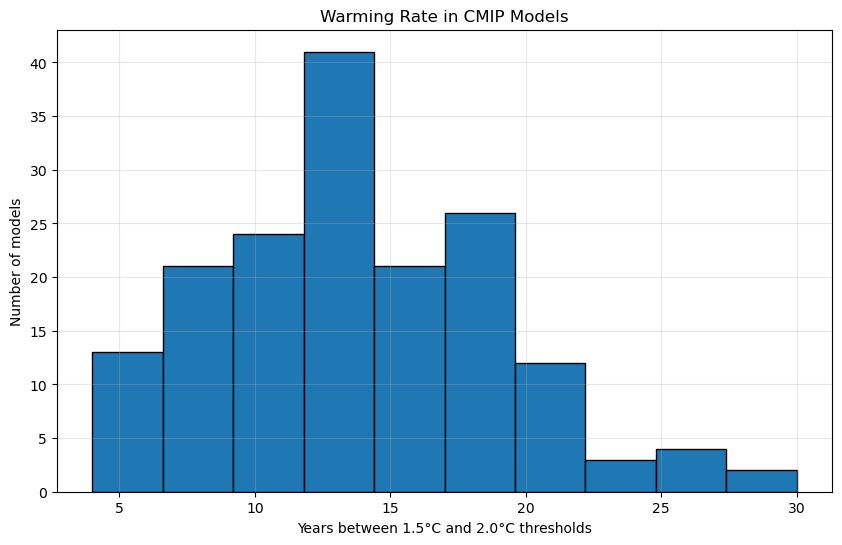

In [ ]:
# Create histogram of time differences
plt.figure(figsize=(10, 6))
plt.hist(warming_periods, bins=10, edgecolor='black')
plt.xlabel('Years between 1.5°C and 2.0°C thresholds')
plt.ylabel('Number of models')
plt.title('Warming Rate in CMIP Models')
plt.grid(True, alpha=0.3)
plt.show()

## Detailed Analysis of Fastest and Slowest Warming Models
Let's identify and visualize the models that show the shortest and longest time periods between reaching 1.5°C and 2.0°C warming thresholds. This will help us understand the range of warming trajectories in the model ensemble.


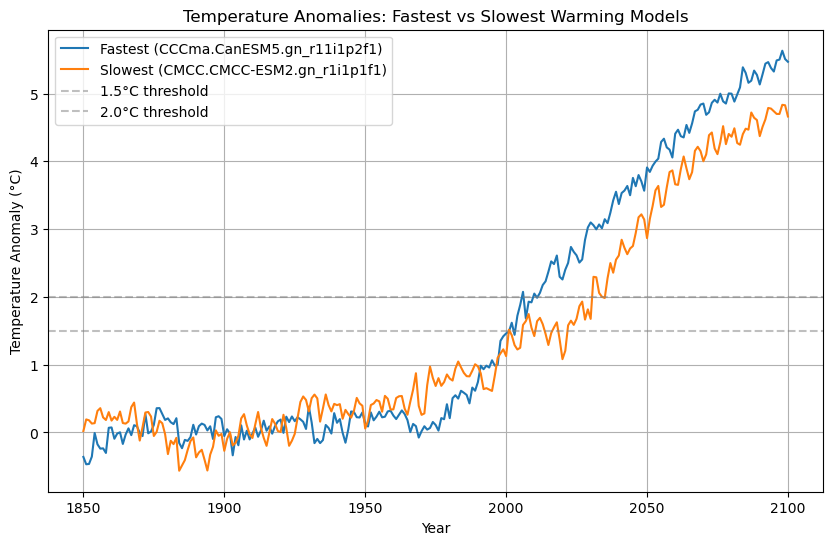

Fastest warming model: CCCma.CanESM5.gn_r11i1p2f1
Time between 1.5°C and 2.0°C: 4.0 years


Slowest warming model: CMCC.CMCC-ESM2.gn_r1i1p1f1
Time between 1.5°C and 2.0°C: 30.0 years


In [50]:
# Find models with shortest and longest periods between thresholds
warming_periods_valid = warming_periods.dropna()

if not warming_periods_valid.empty:
    # Get fastest and slowest warming models
    fastest_model = warming_periods_valid.idxmin()
    slowest_model = warming_periods_valid.idxmax()
    fastest_period = warming_periods_valid[fastest_model]
    slowest_period = warming_periods_valid[slowest_model]

    # Get temperature anomalies for fastest and slowest models
    fastest_anomalies = anomalies[fastest_model]
    slowest_anomalies = anomalies[slowest_model]

    # Plot the anomalies
    plt.figure(figsize=(10, 6))
    plt.plot(fastest_anomalies, label=f'Fastest ({fastest_model})')
    plt.plot(slowest_anomalies, label=f'Slowest ({slowest_model})')
    plt.axhline(y=1.5, color='gray', linestyle='--', alpha=0.5, label='1.5°C threshold')
    plt.axhline(y=2.0, color='gray', linestyle='--', alpha=0.5, label='2.0°C threshold')
    plt.xlabel('Year')
    plt.ylabel('Temperature Anomaly (°C)')
    plt.title('Temperature Anomalies: Fastest vs Slowest Warming Models')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Fastest warming model: {fastest_model}")
    print(f"Time between 1.5°C and 2.0°C: {fastest_period} years")
    print("\n")
    print(f"Slowest warming model: {slowest_model}")
    print(f"Time between 1.5°C and 2.0°C: {slowest_period} years")
else:
    print("No models reach both thresholds")
